In [2]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose

## Read files

In [34]:
# 번프 판매액

read_path = '../csv/bunp_category_detail.csv'
df_bunp = pd.read_csv(read_path)

df_bunp['category_3'] = df_bunp['category'].astype(str).str[:3]
df_bunp['category_6'] = df_bunp['category'].astype(str).str[:6]

df_bunp['month'] = df_bunp['updated_at'].astype(str).str[:7]
df_bunp['month'] = pd.to_datetime(df_bunp['month']) # str -> timestamp

df_bunp = df_bunp[df_bunp.month < '2019-05-01']

# save
save_path = '../csv/tmp/df_bunp.csv'
df_bunp.to_csv(save_path, index=False, mode='w', header=True) # save

In [3]:
read_path = '../csv/tmp/df_bunp.csv'
df_bunp = pd.read_csv(read_path, dtype={'category_3':np.object, 'category_6':np.object})

df_bunp.tail()

,category,name,updated_at,seller_pid,bunp_amount,category_3,category_6,month
10066448,600700004.0,태블릿,2019-04-30 21:34:53,72627507,650000,600,600700,2019-04-01
10066449,400050300.0,샌들/슬리퍼,2019-04-30 22:14:59,85994082,13000,400,400050,2019-04-01
10066450,900400200.0,수집품,2019-04-30 22:22:29,101358979,3000,900,900400,2019-04-01
10066451,600700004.0,태블릿,2019-04-30 22:33:08,101203884,580000,600,600700,2019-04-01
10066452,320100999.0,기타(코트),2019-04-30 23:00:15,101234884,220000,320,320100,2019-04-01


In [4]:
# 제품 카테고리

read_path = '../csv/categories.csv'

df_categories = pd.read_csv(read_path)

df_categories['category'] = df_categories['category'].astype(str)
df_categories = df_categories[['category', 'name']]

df_categories.tail()

,category,name
1219,240100030,서비스/미디어
1220,240100050,생산/기능직
1221,240100070,상담영업
1222,240100090,기타 업종
1223,240100110,단기알바


## 데이터 핸들링

In [37]:
# merge bunp with category

df_bunp_cate = pd.merge(df_bunp, df_categories, how = 'left', left_on = 'category_3', right_on = 'category')
df_bunp_cate = df_bunp_cate.rename(columns = {'name_x': 'name', 'name_y': 'name_general'})

df_bunp_cate_general = df_bunp_cate.groupby(['month', 'name_general']).agg({'bunp_amount': 'sum'}).unstack()

df_bunp_cate_general['total'] = df_bunp_cate_general[:].sum(axis=1)

df_bunp_cate.tail()

,category_x,name,updated_at,seller_pid,bunp_amount,category_3,category_6,month,category_y,name_general
10066448,600700004.0,태블릿,2019-04-30 21:34:53,72627507,650000,600,600700,2019-04-01,600,디지털/가전
10066449,400050300.0,샌들/슬리퍼,2019-04-30 22:14:59,85994082,13000,400,400050,2019-04-01,400,패션잡화
10066450,900400200.0,수집품,2019-04-30 22:22:29,101358979,3000,900,900400,2019-04-01,900,도서/티켓/취미/애완
10066451,600700004.0,태블릿,2019-04-30 22:33:08,101203884,580000,600,600700,2019-04-01,600,디지털/가전
10066452,320100999.0,기타(코트),2019-04-30 23:00:15,101234884,220000,320,320100,2019-04-01,320,남성의류


In [7]:
# merge bunp with category

df_bunp_cate_6 = pd.merge(df_bunp, df_categories, how = 'left', left_on = 'category_6', right_on = 'category')
df_bunp_cate_6 = df_bunp_cate_6.rename(columns = {'name_x': 'name', 'name_y': 'name_detail', 'category_y': 'category_detail'})

df_bunp_cate_detail = df_bunp_cate_6.groupby(['month', 'name_detail']).agg({'bunp_amount': 'sum'}).unstack()

df_bunp_cate_detail['total'] = df_bunp_cate_detail[:].sum(axis=1) 

df_bunp_cate_detail.tail()

bunp_amount                                                  \
name_detail    (구)가방/지갑 (구)남성의류 (구)뷰티 (구)신발 (구)여성의류 (구)쥬얼리/시계 (구)티켓/할인권   
month                                                                     
2018-12-01          NaN     NaN   NaN   NaN     NaN       NaN       NaN   
2019-01-01          NaN     NaN   NaN   NaN     NaN       NaN       NaN   
2019-02-01          NaN     NaN   NaN   NaN     NaN       NaN       NaN   
2019-03-01          NaN     NaN   NaN   NaN     NaN       NaN       NaN   
2019-04-01          NaN     NaN   NaN   NaN     NaN       NaN       NaN   

                                          ...                            \
name_detail (구)패션잡화  IT/디자인  PC/모니터/주변기기  ...         트레이닝       티켓/항공권   
month                                     ...                             
2018-12-01      NaN     NaN  490279214.0  ...  460625848.0  155818252.0   
2019-01-01      NaN     NaN  561008531.0  ...  420851391.0  309889227.0   
2019-02-01      NaN     NaN  588287932.0  ...  463787236.0  108870641.0   
2019-03-01      NaN  2000.0  509776718.0  ...  517913409.0   90951303.0   
2019-04-01      NaN     NaN  415891295.0  ...  456042288.0  103674394.0   

                                                                        \
name_detail     학원/수강       향수/아로마        헤어/바디     헬스/요가     헬스/요가/골프   
month                                                                    
2018-12-01   100000.0  130931147.0   84590565.0  350000.0  127738349.0   
2019-01-01    19000.0  141852341.0   93369858.0  275000.0  127648510.0   
2019-02-01   113000.0  149751548.0   98513949.0  320000.0  121505355.0   
2019-03-01        NaN  161998172.0  106356819.0  170000.0  174975533.0   
2019-04-01        NaN  150468249.0   95038239.0  270000.0  177471386.0   

                                          total  
name_detail  호텔/펜션/숙박      희귀/수집품                
month                                            
2018-12-01   247500.0  36594565.0  2.290706e+10  
2019-01-01   280000.0  44113271.0  2.265186e+10  
2019-02-01   335000.0  43476985.0  2.212316e+10  
2019-03-01   560000.0  48602363.0  2.309447e+10  
2019-04-01   560000.0  39742074.0  2.117328e+10  

[5 rows x 160 columns]

## Seasonality Decomposition

In [14]:
# 전체 거래액 분해

df_bunp_cate_general_agg = df_bunp_cate_general.groupby(['month']).agg({'total': 'sum'})
df_bunp_cate_general_agg = df_bunp_cate_general_agg.rename(columns = {'total': 'bunp_amount'})

df_bunp_cate_general_agg.tail()

/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,bunp_amount
month,
2018-12-01,2.335470e+10
2019-01-01,2.313649e+10
2019-02-01,2.261814e+10
2019-03-01,2.358679e+10
2019-04-01,2.162429e+10


In [15]:
# from matplotlib import pyplot
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose

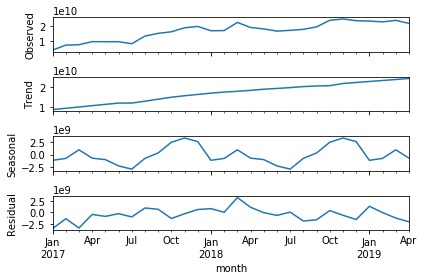

In [16]:


# from random import randrange
# from pandas import Series
# from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_bunp_cate_general_agg, model='additive', freq=12, extrapolate_trend='freq')

fig = result.plot()

matplotlib.rcParams['figure.figsize'] = [10,6]

# pyplot.show()



observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid

df_observed = pd.DataFrame(observed).rename(columns={'bunp_amount': 'observed'})
df_trend = pd.DataFrame(trend).rename(columns={'bunp_amount': 'trend'})
df_seasonal = pd.DataFrame(seasonal).rename(columns={'bunp_amount': 'seasonal'})
df_residual = pd.DataFrame(residual).rename(columns={'bunp_amount': 'residual'})

df_result = pd.merge(df_observed, df_trend, how='left', on='month')
df_result = pd.merge(df_result, df_seasonal, how='left', on='month')
df_result = pd.merge(df_result, df_residual, how='left', on='month')

df_result['category'] = 'total'
    
df_result.to_csv('../csv/tmp/result_overall_seasonal.csv', index=True, mode='w', header=True)


## Seasonality by Category

In [17]:
df_bunp_cate_general_1 = df_bunp_cate.groupby(['month', 'name_general'], as_index=False).sum()
df_bunp_cate_general_1.tail()

,month,name_general,category_x,seller_pid,bunp_amount
502,2019-04-01,재능,1.004827e+11,44196268418,11817080
503,2019-04-01,지역 서비스,1.060035e+07,4297485198,2511690
504,2019-04-01,차량/오토바이,6.870513e+11,187091582983,229561982
505,2019-04-01,커뮤니티,3.625400e+06,3322917546,1462623
506,2019-04-01,패션잡화,3.251960e+13,7669621189462,6307458844


구인구직


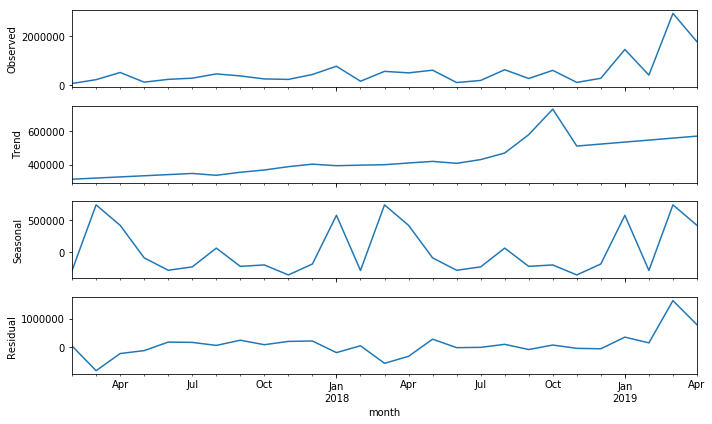

기타


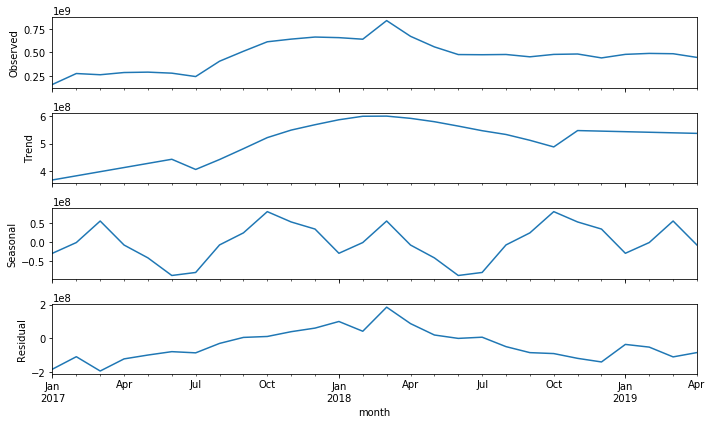

남성의류


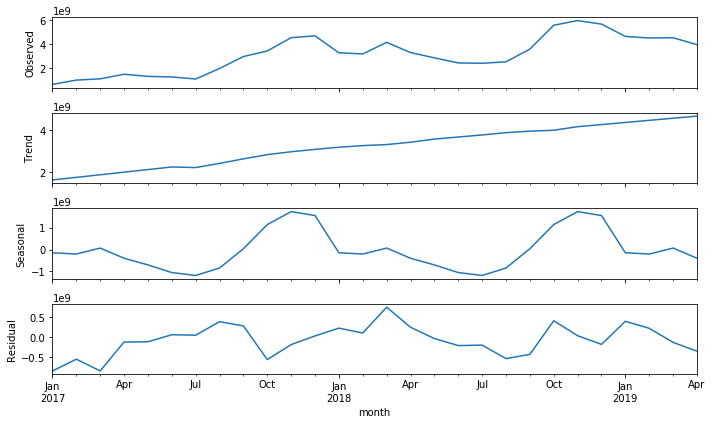

도서/티켓/취미/애완


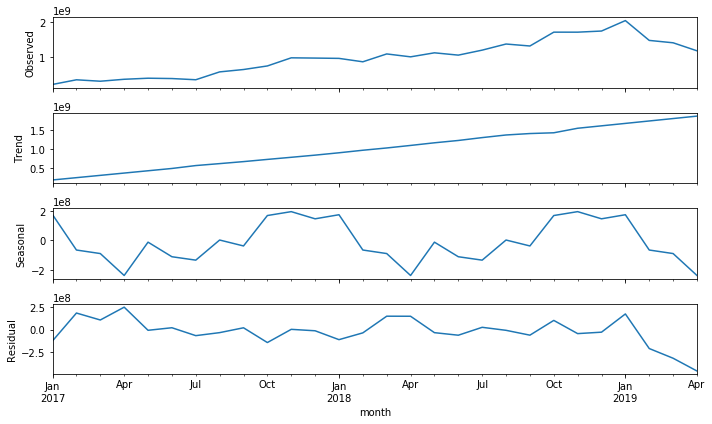

디지털/가전


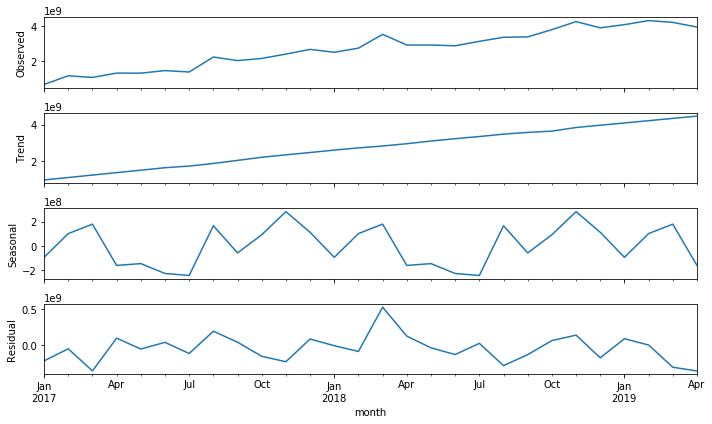

번개나눔


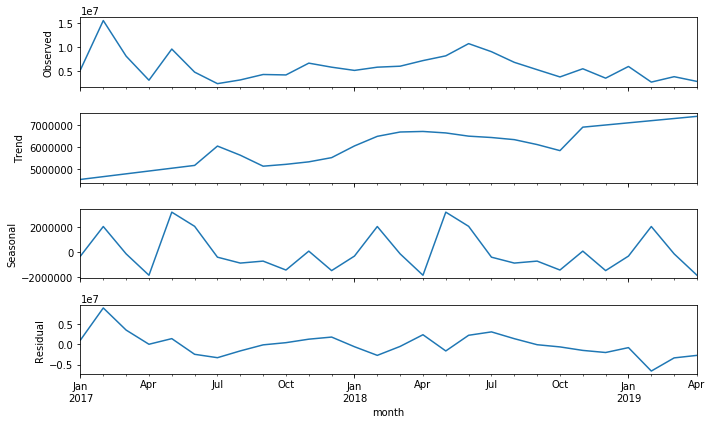

뷰티/미용


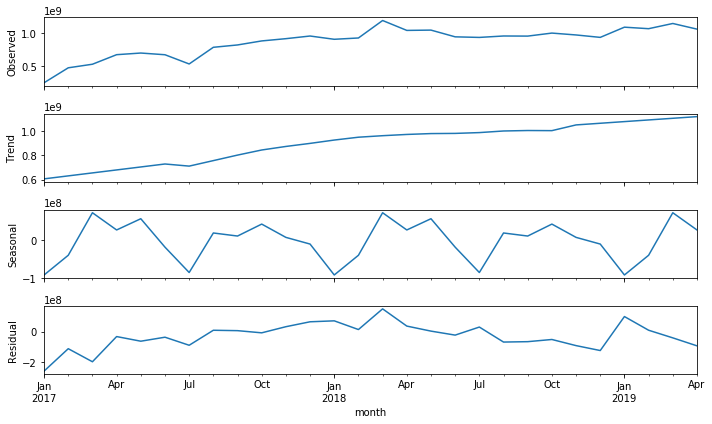

생활/문구/가구/식품


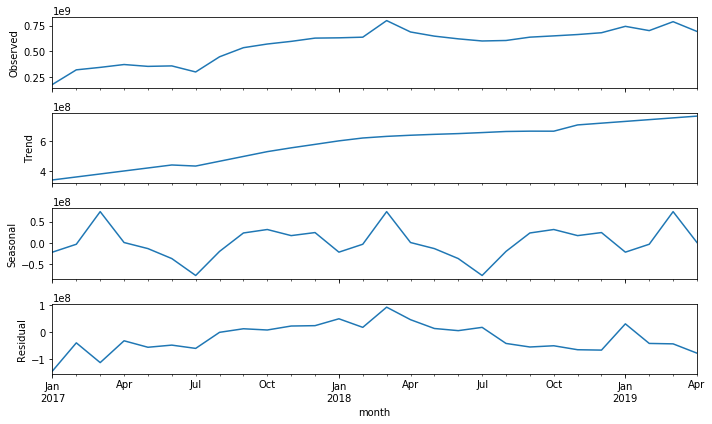

스타굿즈


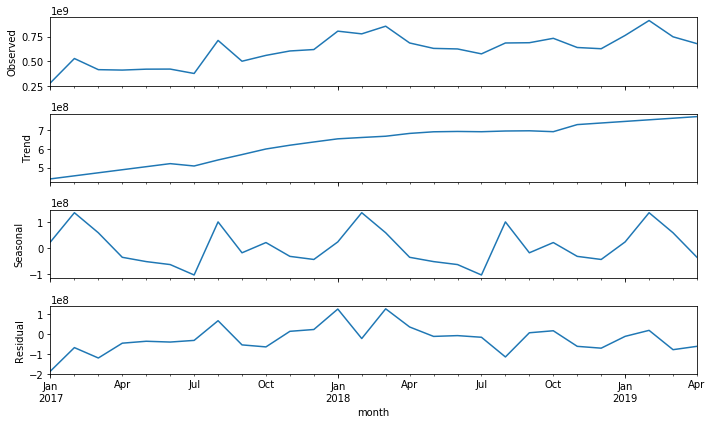

스포츠/레저


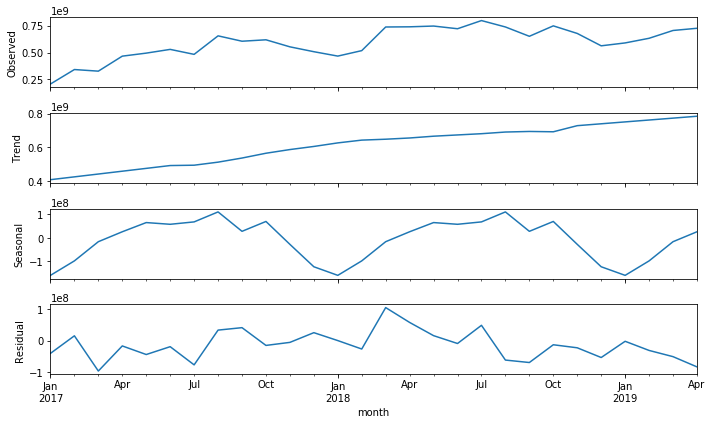

여성의류


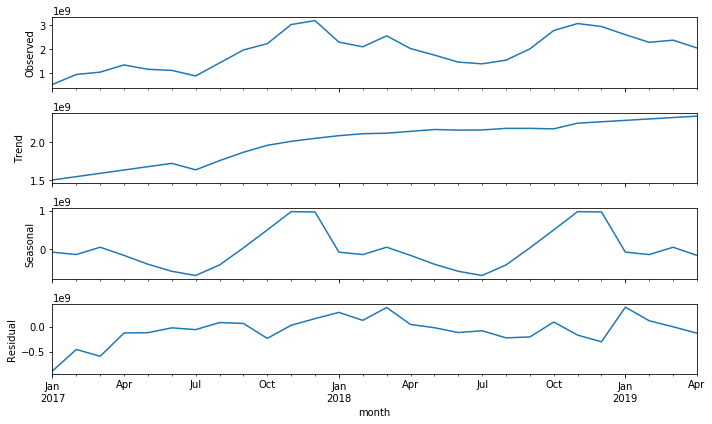

원룸/함께살아요


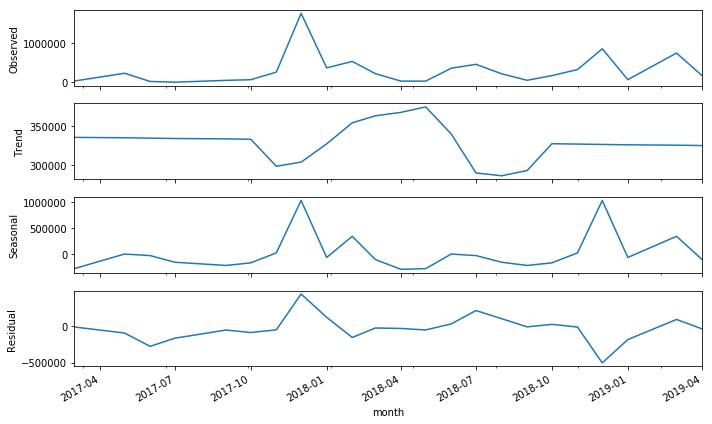

유아동/출산


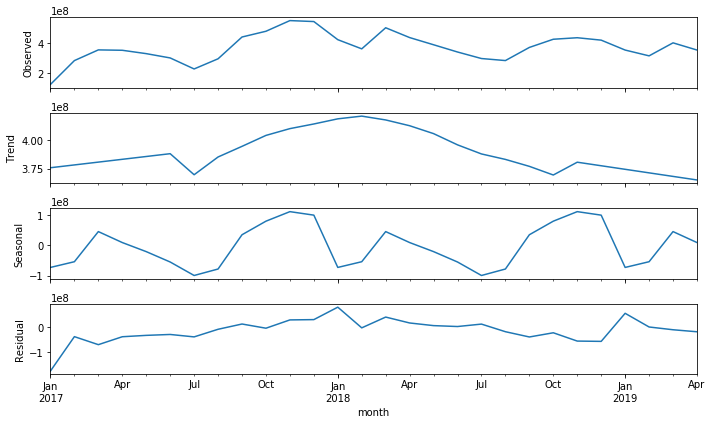

재능


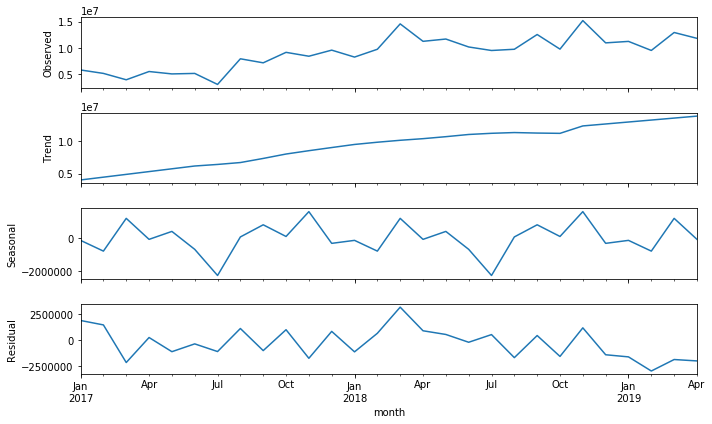

지역 서비스


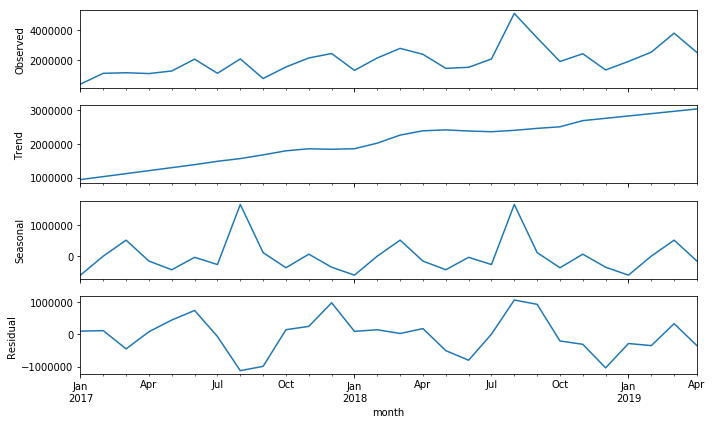

차량/오토바이


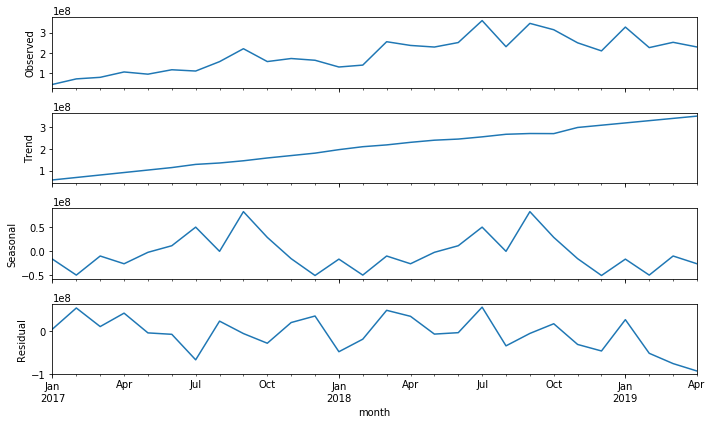

커뮤니티


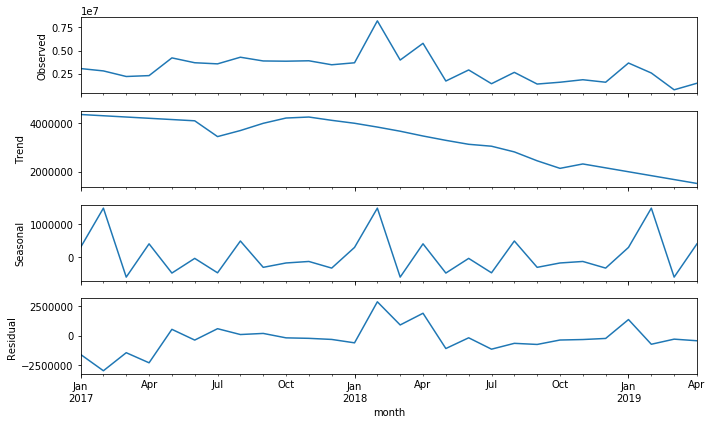

패션잡화


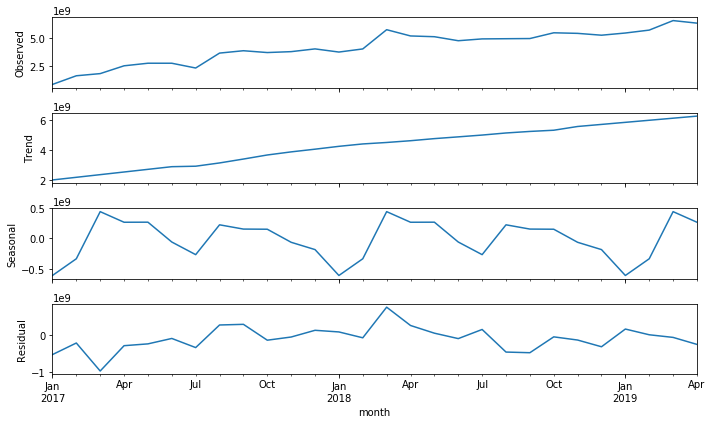

In [120]:

categories = ['구인구직', '기타', '남성의류', '도서/티켓/취미/애완', '디지털/가전', '번개나눔', '뷰티/미용', '생활/문구/가구/식품', 
'스타굿즈', '스포츠/레저', '여성의류', '원룸/함께살아요', '유아동/출산', '재능', '지역 서비스', '차량/오토바이', '커뮤니티', '패션잡화']


for i, category in enumerate(categories):

    df = df_bunp_cate_general_1[df_bunp_cate_general_1.name_general == category]
    df_agg = df.groupby(['month']).agg({'bunp_amount': 'sum'})

    result_detail = seasonal_decompose(df_agg, model='additive', freq=12, extrapolate_trend='freq')
    
    print(cate)
    result_detail.plot()
    pyplot.show()


    observed = result_detail.observed
    trend = result_detail.trend
    seasonal = result_detail.seasonal
    residual = result_detail.resid

    df_observed = pd.DataFrame(observed).rename(columns={'bunp_amount': 'observed'})
    df_trend = pd.DataFrame(trend).rename(columns={'bunp_amount': 'trend'})
    df_seasonal = pd.DataFrame(seasonal).rename(columns={'bunp_amount': 'seasonal'})
    df_residual = pd.DataFrame(residual).rename(columns={'bunp_amount': 'residual'})

    df_result = pd.merge(df_observed, df_trend, how='left', on='month')
    df_result = pd.merge(df_result, df_seasonal, how='left', on='month')
    df_result = pd.merge(df_result, df_residual, how='left', on='month')

    df_result['category'] = cate 
    
    if i == 0:
        df_result.to_csv('../csv/tmp/result_category_seasonal.csv', index=True, mode='w', header=True) # save
        
    else:
        df_result.to_csv('../csv/tmp/result_category_seasonal.csv', index=True, mode='a', header=False) # save
    
    i += 1



https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

## Sesonality of 남성 의류 320

In [122]:
df_bunp_cate_detail_1 = df_bunp_cate.groupby(['month', 'name_detail'], as_index=False).sum()
df_bunp_cate_detail_1.tail()

,month,name_detail,category_x,seller_pid,bunp_amount
19322,2019-04-01,후드 집업,1.054101e+12,323376121644,235041422
19323,2019-04-01,후드 티셔츠,1.488801e+12,455185226985,262926011
19324,2019-04-01,후드/니트 원피스,7.039726e+10,21587921903,6073600
19325,2019-04-01,후드/져지 자켓,1.814913e+11,54829945493,47682599
19326,2019-04-01,희귀품,1.089484e+11,11572255355,3843594


In [123]:
df_bunp_group = df_bunp[df_bunp.category_3 == '320']

df_bunp_group['category_6'] = df_bunp_group['category'].astype(str).str[:6]
df_bunp_group.tail()

/Users/quicket/python-bunjang/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,category,name,updated_at,seller_pid,bunp_amount,category_3,month,category_6
10309428,320040300.0,린넨/마 셔츠,2019-04-30 23:22:10,101016427,53000,320,2019-04-01,320040
10311321,320090999.0,기타(자켓),2019-04-29 22:14:42,101133693,30000,320,2019-04-01,320090
10311322,320020999.0,기타(반팔 티셔츠),2019-04-29 22:16:34,93828757,125000,320,2019-04-01,320020
10311336,320110100.0,일자 청바지,2019-04-30 17:59:46,99715710,59000,320,2019-04-01,320110
10311346,320100999.0,기타(코트),2019-04-30 23:00:15,101234884,220000,320,2019-04-01,320100


In [124]:
# 제품 카테고리

path = '../csv/categories.csv'

df_categories = pd.read_csv(path)

df_categories['category_6'] = df_categories['category'].astype(str).str[:6]
df_categories = df_categories[['category_6','name']]

df_categories.tail()

,category_6,name
1219,240100,서비스/미디어
1220,240100,생산/기능직
1221,240100,상담영업
1222,240100,기타 업종
1223,240100,단기알바


In [125]:
df_bunp_group_cate = pd.merge(df_bunp_group, df_categories, how='left', on='category_6')
df_bunp_group_cate = df_bunp_group_cate.rename(columns={'name_y': 'cate_name'})

df_bunp_group_cate_agg = df_bunp_group_cate.groupby(['month', 'cate_name'], as_index=False).agg({'bunp_amount': 'sum'})
df_bunp_group_cate_agg.tail()

,month,cate_name,bunp_amount
3299,2019-04-01,헨리넥 셔츠,198140315
3300,2019-04-01,후드 가디건,153980520
3301,2019-04-01,후드 집업,1009663432
3302,2019-04-01,후드 티셔츠,1009663432
3303,2019-04-01,후드/져지 자켓,440357558


긴팔 티셔츠


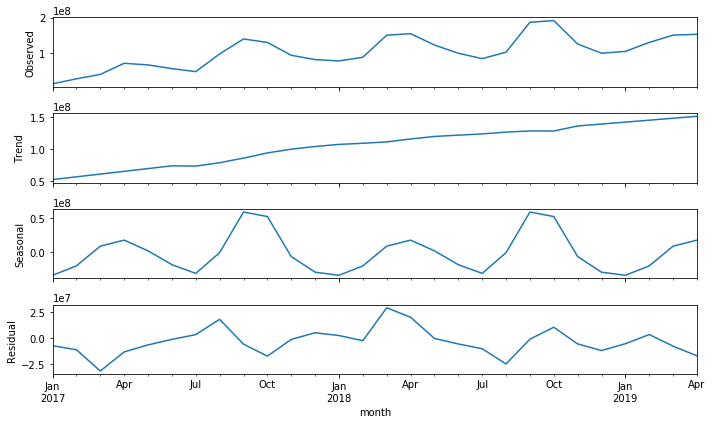

반팔 티셔츠


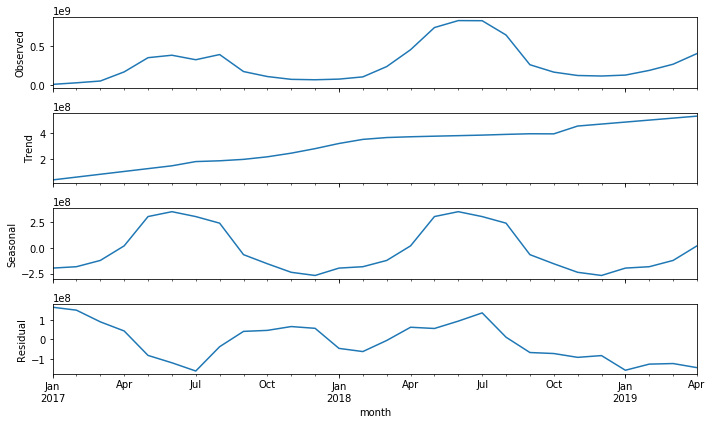

맨투맨/후드티


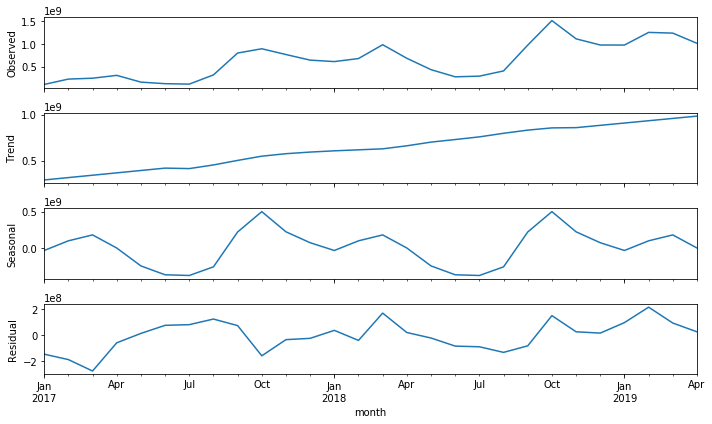

셔츠/남방


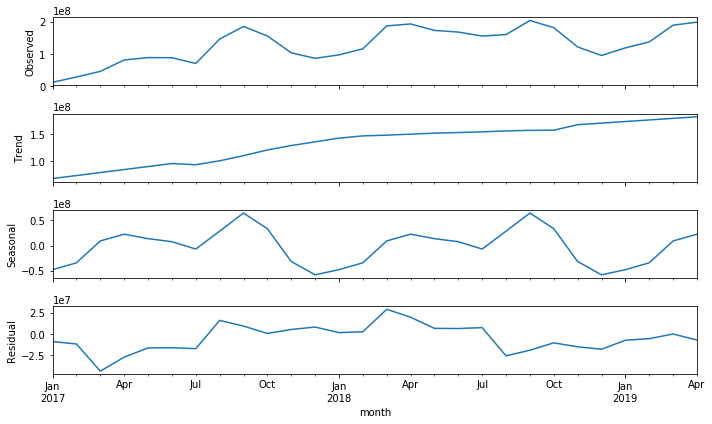

니트/스웨터


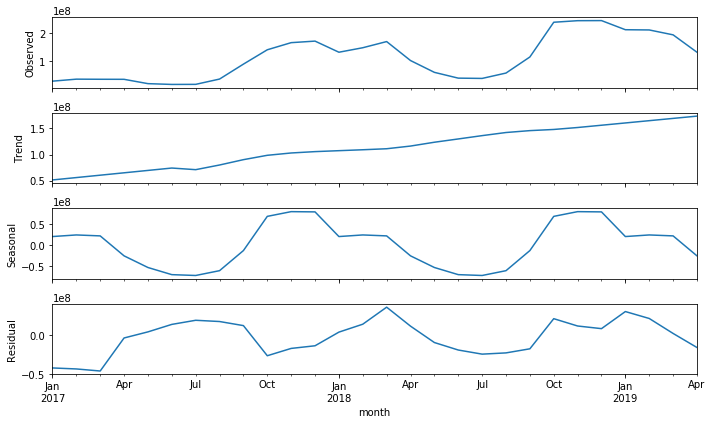

가디건 


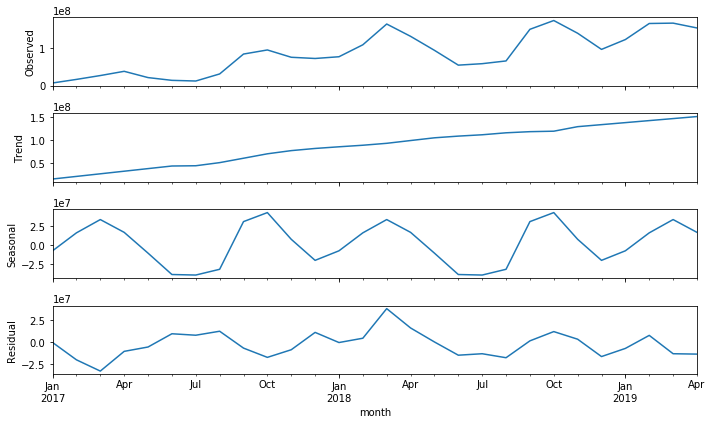

조끼/베스트


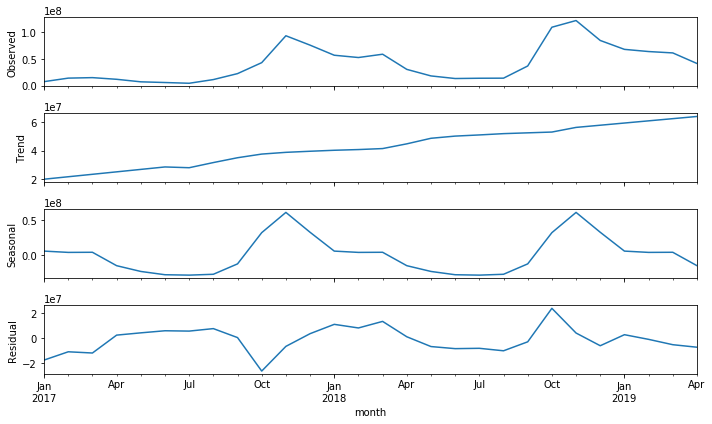

점퍼/야상/패딩


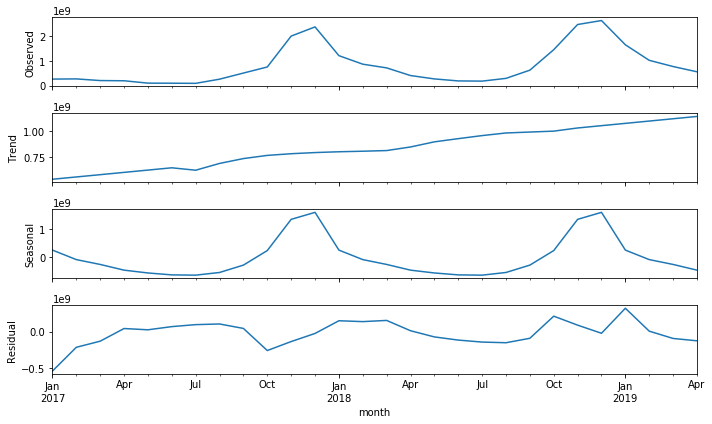

자켓


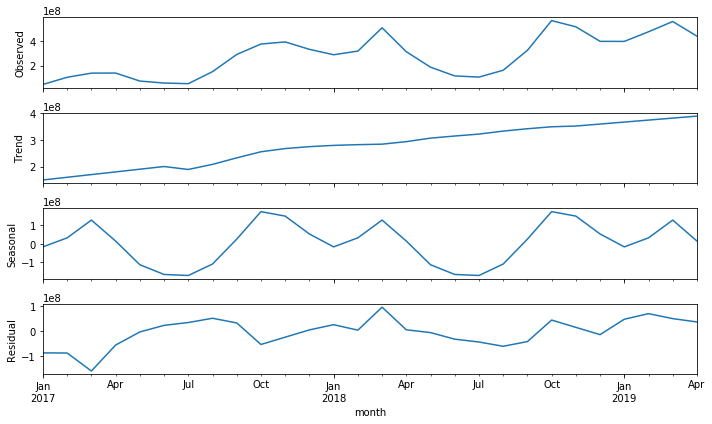

코트


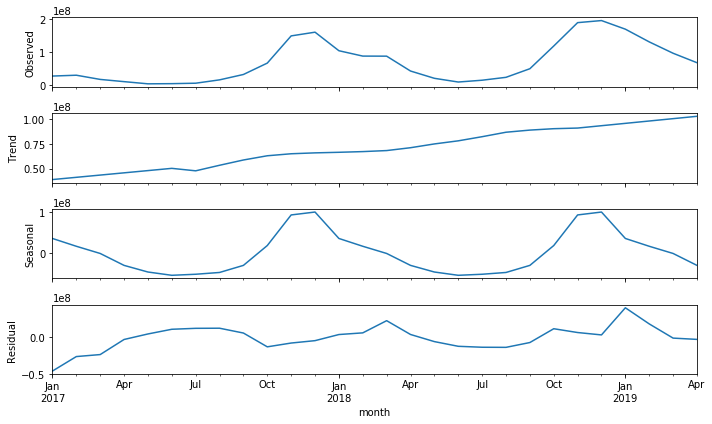

청바지(긴)


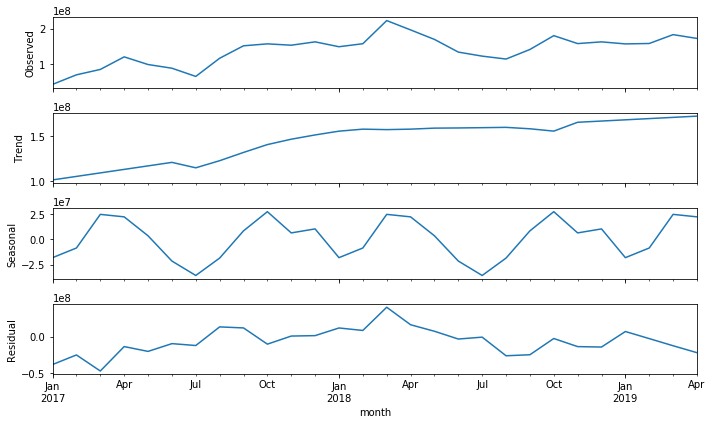

면/캐주얼 바지(긴)


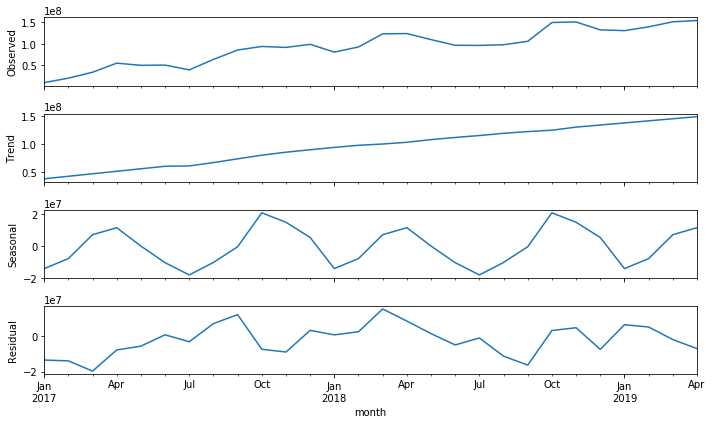

반바지/7~9부


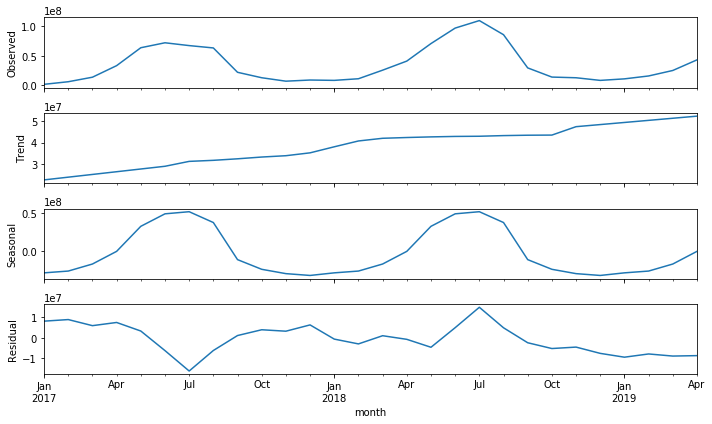

비즈니스 정장


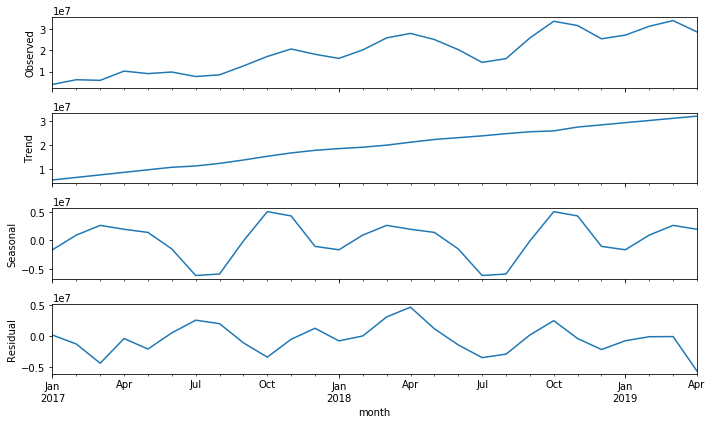

트레이닝


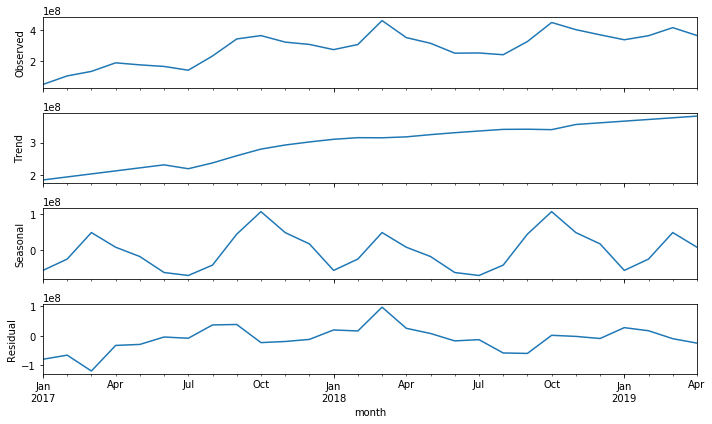

언더웨어/속옷


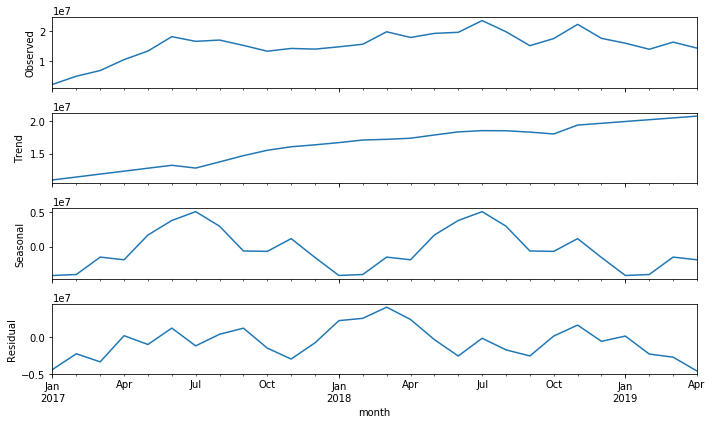

빅사이즈


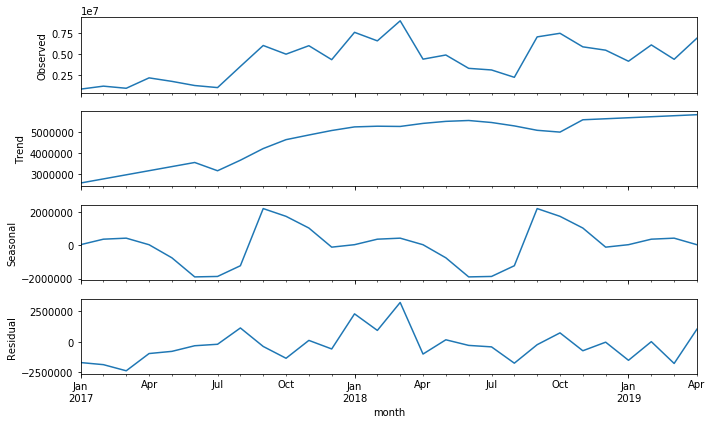

테마/이벤트 의류


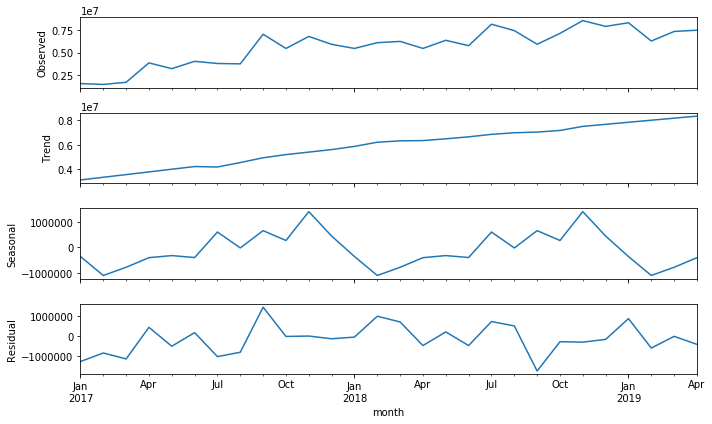

In [126]:
cate_detail_list = ['긴팔 티셔츠', '반팔 티셔츠', '맨투맨/후드티', '셔츠/남방', '니트/스웨터', '가디건 ', '조끼/베스트', 
'점퍼/야상/패딩', '자켓', '코트', '청바지(긴)', '면/캐주얼 바지(긴)', '반바지/7~9부', '비즈니스 정장', '트레이닝', '언더웨어/속옷', 
'빅사이즈', '테마/이벤트 의류']


for i, category in enumerate(cate_detail_list):

    df = df_bunp_group_cate_agg[df_bunp_group_cate_agg.cate_name == category]

    df_agg = df.groupby(['month']).agg({'bunp_amount': 'sum'})

    result_detail = seasonal_decompose(df_agg, model='additive', freq=12, extrapolate_trend='freq')
    
    print(cate)
    result_detail.plot()
    pyplot.show()


    observed = result_detail.observed
    trend = result_detail.trend
    seasonal = result_detail.seasonal
    residual = result_detail.resid

    df_observed = pd.DataFrame(observed).rename(columns={'bunp_amount': 'observed'})
    df_trend = pd.DataFrame(trend).rename(columns={'bunp_amount': 'trend'})
    df_seasonal = pd.DataFrame(seasonal).rename(columns={'bunp_amount': 'seasonal'})
    df_residual = pd.DataFrame(residual).rename(columns={'bunp_amount': 'residual'})

    df_result = pd.merge(df_observed, df_trend, how='left', on='month')
    df_result = pd.merge(df_result, df_seasonal, how='left', on='month')
    df_result = pd.merge(df_result, df_residual, how='left', on='month')

    df_result['category'] = category
    
    save_path = '../csv/tmp/result_category_detail_seasonal.csv'
    
    if i == 0:
        df_result.to_csv(save_path, index=True, mode='w', header=True) # save
        
    else:
        df_result.to_csv(save_path, index=True, mode='a', header=False) # save
    
    i += 1



## Seasonaligy by 2-Depth Category

In [82]:
# 2-depth 카테고리 리스트 만들기

df_bunp_cate_detail_6 = df_bunp_cate_6.groupby(['category_detail', 'name_detail'], as_index=False).sum()

categories = df_bunp_cate_detail_6[['category_detail', 'name_detail']]

category_6 = categories.to_dict('records')



In [83]:

for i, category in enumerate(category_6):

    df = df_bunp_cate_detail[df_bunp_cate_detail.category_6 == category['category_detail']]

    df_agg = df.groupby(['month']).agg({'bunp_amount': 'sum'})
    
    try: 
        result_detail = seasonal_decompose(df_agg, model='additive', freq=12, extrapolate_trend='freq')
    except:
        continue
    

#     result_detail.plot()
#     pyplot.show()


    observed = result_detail.observed
    trend = result_detail.trend
    seasonal = result_detail.seasonal
    residual = result_detail.resid

    df_observed = pd.DataFrame(observed).rename(columns={'bunp_amount': 'observed'})
    df_trend = pd.DataFrame(trend).rename(columns={'bunp_amount': 'trend'})
    df_seasonal = pd.DataFrame(seasonal).rename(columns={'bunp_amount': 'seasonal'})
    df_residual = pd.DataFrame(residual).rename(columns={'bunp_amount': 'residual'})

    df_result = pd.merge(df_observed, df_trend, how='left', on='month')
    df_result = pd.merge(df_result, df_seasonal, how='left', on='month')
    df_result = pd.merge(df_result, df_residual, how='left', on='month')

    df_result['category'] = category['category_detail']
    df_result['name'] = category['name_detail']
    
    save_path = '../csv/tmp/result_category_detail_6_seasonal.csv'
    
    if i == 0:
        df_result.to_csv(save_path, index=True, mode='w', header=True) # save
        
    else:
        df_result.to_csv(save_path, index=True, mode='a', header=False) # save
    
    i += 1

print("done")

done
